# TfidfVectorizer Explanation
Convert a collection of raw documents to a matrix of TF-IDF features

TF-IDF where TF means term frequency, and IDF means Inverse Document frequency.

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [95]:
vect = TfidfVectorizer()

## Let's start the work

In [8]:
import os
os.chdir("D:/Fake News Detection")

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'D:/Fake News Detection'

In [9]:
import pandas as pd

In [10]:
dataframe = pd.read_csv('news.csv')
dataframe.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [11]:
x = dataframe['text']
y = dataframe['label']

In [12]:
x

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object

In [13]:
y

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

<AxesSubplot:xlabel='label', ylabel='count'>

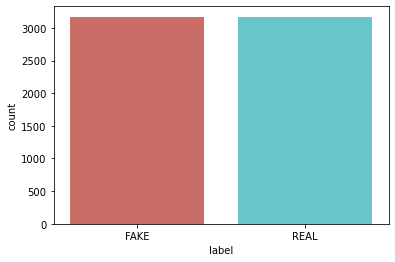

In [87]:
import seaborn as sb

sb.countplot(x='label', data=dataframe, palette='hls')

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
y_train

2402    REAL
1922    REAL
3475    FAKE
6197    REAL
4748    FAKE
        ... 
4931    REAL
3264    REAL
1653    FAKE
2607    FAKE
2732    REAL
Name: label, Length: 5068, dtype: object

In [16]:
y_train

2402    REAL
1922    REAL
3475    FAKE
6197    REAL
4748    FAKE
        ... 
4931    REAL
3264    REAL
1653    FAKE
2607    FAKE
2732    REAL
Name: label, Length: 5068, dtype: object

# Tfidf

In [17]:
tfvect = TfidfVectorizer(stop_words='english',max_df=0.7)
tfid_x_train = tfvect.fit_transform(x_train)
tfid_x_test = tfvect.transform(x_test)

* max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
* max_df = 25 means "ignore terms that appear in more than 25 documents".

#        # Logistics

In [30]:
from sklearn.linear_model import LogisticRegression


LR = LogisticRegression()
LR.fit(tfid_x_train,y_train)

LogisticRegression()

In [102]:
Lr_pred = LR.predict(tfid_x_test)
score = accuracy_score(y_test,Lr_pred)
print(f'Accuracy: {round(score*100,2)}%')
cf = confusion_matrix(y_test,Lr_pred, labels=['FAKE','REAL'])
print(cf)

Accuracy: 91.55%
[[570  45]
 [ 62 590]]


In [88]:
cf = confusion_matrix(y_test,Lr_pred, labels=['FAKE','REAL'])
print(cf)
print(classification_report(y_test,Lr_pred))

[[570  45]
 [ 62 590]]
              precision    recall  f1-score   support

        FAKE       0.90      0.93      0.91       615
        REAL       0.93      0.90      0.92       652

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



# NB

In [107]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(tfid_x_train,y_train)

Nb_pred = NB.predict(tfid_x_test)
score = accuracy_score(y_test,Nb_pred)
print(f'Accuracy: {round(score*100,2)}%')
cf = confusion_matrix(y_test,Nb_pred, labels=['FAKE','REAL'])
print(cf)

Accuracy: 83.19%
[[420 195]
 [ 18 634]]


In [89]:
cf = confusion_matrix(y_test,Dt_pred, labels=['FAKE','REAL'])
print(cf)
print(classification_report(y_test,Dt_pred))

[[502 113]
 [ 90 562]]
              precision    recall  f1-score   support

        FAKE       0.85      0.82      0.83       615
        REAL       0.83      0.86      0.85       652

    accuracy                           0.84      1267
   macro avg       0.84      0.84      0.84      1267
weighted avg       0.84      0.84      0.84      1267



# Random Forest Classifier

In [104]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(tfid_x_train,y_train)

Rfc_pred = RFC.predict(tfid_x_test)
score = accuracy_score(y_test,Rfc_pred)
print(f'Accuracy: {round(score*100,2)}%')
cf = confusion_matrix(y_test,Rfc_pred, labels=['FAKE','REAL'])
print(cf)

Accuracy: 90.92%
[[552  63]
 [ 52 600]]


In [90]:
cf = confusion_matrix(y_test,Rfc_pred, labels=['FAKE','REAL'])
print(cf)
print(classification_report(y_test,Rfc_pred))

[[552  63]
 [ 52 600]]
              precision    recall  f1-score   support

        FAKE       0.91      0.90      0.91       615
        REAL       0.90      0.92      0.91       652

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267



# SVM

In [39]:
from sklearn import svm
SVM = svm.SVC()
SVM.fit(tfid_x_train,y_train)


SVC()

In [40]:
Svm_pred = SVM.predict(tfid_x_test)
score = accuracy_score(y_test,Svm_pred)


Accuracy: 92.66%


In [105]:
cf = confusion_matrix(y_test,Svm_pred, labels=['FAKE','REAL'])
print(f'Accuracy: {round(score*100,2)}%')
print(cf)
# print(classification_report(y_test,Svm_pred))

Accuracy: 90.92%
[[577  38]
 [ 55 597]]


# Passive Agressive

In [18]:
classifier = PassiveAggressiveClassifier(max_iter=50)
classifier.fit(tfid_x_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [100]:
y_pred = classifier.predict(tfid_x_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')
cf = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print(cf)

Accuracy: 93.45%
[[572  43]
 [ 40 612]]


In [93]:
cf = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print(cf)
print(classification_report(y_test,y_pred))

[[572  43]
 [ 40 612]]
              precision    recall  f1-score   support

        FAKE       0.93      0.93      0.93       615
        REAL       0.93      0.94      0.94       652

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



In [21]:
def fake_news_det(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = classifier.predict(vectorized_input_data)
    print(prediction)

In [22]:
fake_news_det('U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sundayâ€™s unity march against terrorism.')

['REAL']


In [23]:
fake_news_det("""Go to Article 
President Barack Obama has been campaigning hard for the woman who is supposedly going to extend his legacy four more years. The only problem with stumping for Hillary Clinton, however, is sheâ€™s not exactly a candidate easy to get too enthused about.  """)

['FAKE']


In [24]:
import pickle
pickle.dump(classifier,open('model.pkl', 'wb'))

In [25]:
# load the model from disk
loaded_model = pickle.load(open('model.pkl', 'rb'))

In [80]:
def fake_news_det1(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = loaded_model.predict(vectorized_input_data)
#     probability = loaded_model.predict_proba(vectorized_input_data)
    print(prediction)


In [82]:
fake_news_det1("""Changing the Montenegrin leader does not change the ideology""")

['FAKE']


In [76]:
fake_news_det1("""Watch Police viciously attack, arrest peaceful protesters at DAPL including children and the elderly""")

['FAKE']


In [77]:
fake_news_det('''15 Civilians Killed In Single US Airstrike Have Been Identified''')

['FAKE']
